# 1. Знакомимся с данными

✍ Вы уже умеете присоединять строки друг к другу путём добавления столбцов «сбоку» — с помощью различных видов JOIN.

?
А что если нам необходимо присоединить несколько результатов «снизу», так, чтобы получить общий результат в выводе?

Ответу на этот вопрос и посвящён текущий модуль.

**Обратите внимание!** Вы можете посмотреть подробный разбор структуры предлагаемых запросов во вкладке Детализация.

Но прежде, как всегда, разберёмся с датасетом ↓

В данном блоке мы будем работать с данными о компании, организующей перевозки грузов.

⛏
ЗАГЛЯНЕМ В METABASE!

Интересующие нас данные хранятся в таблицах city, customer, driver, shipment, truck. Давайте внимательно их изучим.

Ниже представлена ER-диаграмма (от англ. entity-relation, дословно — «сущность-связь»), которая отображает существующие связи между отдельными таблицами.

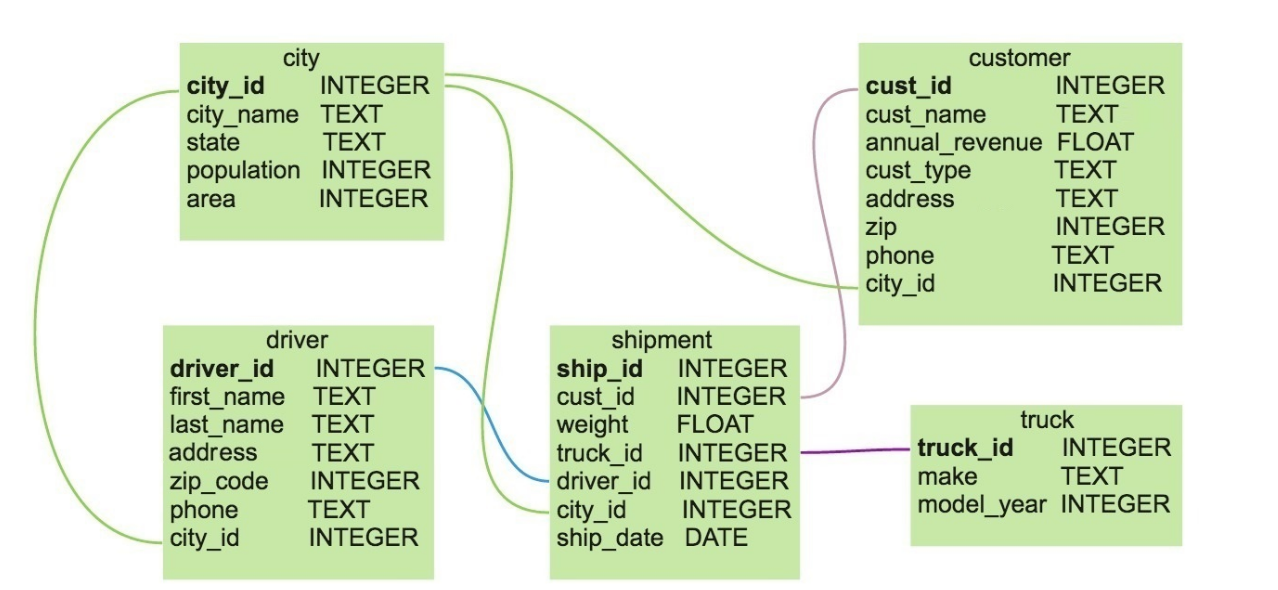

Таблица city — это справочник городов. Структура справочника представлена ниже.

|НАЗВАНИЕ ПОЛЯ|ТИП ДАННЫХ|ОПИСАНИЕ|
|---|---|----|
|city_id|integer|уникальный идентификатор города, первичный ключ|
|city_name|text|название города|
|state|text|штат, к которому относится город|
|population|integer|население города|
|area|numeric|площадь города|

Таблица customer — это справочник клиентов. У компании, с данными которой мы работаем, только корпоративные клиенты, поэтому в таблице нет привычных данных о возрасте и поле. Справочник содержит следующие поля:

|НАЗВАНИЕ ПОЛЯ|ТИП ДАННЫХ|ОПИСАНИЕ|
|---|---|---|
|cust_id|integer|уникальный идентификатор клиента, первичный ключ|
|cust_name|text|название клиента|
|annual_revenue|numeric|ежегодная выручка|
|cust_type|text|тип пользователя|
|address|text|адрес|
|zip|integer|почтовый индекс|
|phone|text|телефон|
|city_id|nteger|идентификатор города, внешний ключ к таблице city|

Следующая таблица — driver — справочник водителей. Перечень сведений, содержащихся в таблице, представлен ниже.

|НАЗВАНИЕ ПОЛЯ|ТИП ДАННЫХ|ОПИСАНИЕ|
|---|---|---|
|driver_id|integer|уникальный идентификатор водителя, первичный ключ|
|first_name|text|имя водителя|
|last_name|text|фамилия водителя|
|address|text|адрес водителя|
|zip_code|integer|почтовый индекс водителя|
|phone|text	телефон|водителя|
|city_id|integer|идентификатор города водителя, внешний ключ к таблице city|

В таблице truck хранится информация о грузовиках, на которых осуществляются перевозки. Данные о них представлены в следующем виде:

|НАЗВАНИЕ ПОЛЯ|ТИП ДАННЫХ|ОПИСАНИЕ|
|---|---|---|
|truck_id|integer|Уникальный идентификатор грузовика, первичный ключ|
|make|text|Производитель грузовика|
|model_year|integer|Дата выпуска грузовика|

Последняя таблица в датасете, shipment, — таблица с данными непосредственно о доставках. Она описывает взаимодействие всех перечисленных сущностей, а потому содержит наибольшее количество ссылок на другие таблицы.|

|НАЗВАНИЕ ПОЛЯ|ТИП ДАННЫХ|ОПИСАНИЕ|
|---|---|---|
|ship_id|integer|уникальный идентификатор доставки, первичный ключ|
|cust_id|integer|идентификатор клиента, которому отправлена доставка, внешний ключ к таблице customer|
|weight|numeric|вес посылки|
|truck_id|integer|идентификатор грузовика, на котором отправлена доставка, внешний ключ к таблице truck|
|driver_id|integer|идентификатор водителя, который осуществлял доставку, внешний ключ к таблице driver|
|city_id|integer|идентификатор города в который совершена доставка, внешний ключ к таблице city|
|ship_date|date|дата доставки|


# 2. UNION

## ПРИНЦИП И УСЛОВИЯ РАБОТЫ UNION

✍ Вернёмся к центральному вопросу модуля: как соединить несколько результатов, чтобы получить в выводе один общий?

Чтобы разобраться в этом вопросе, смоделируем ситуацию.

Допустим, мы хотим собрать из справочников по книгам и фильмам один, так чтобы в нём содержались названия произведений, а также их описание — книга или фильм.

Для этого напишем простой запрос:

<code>

SELECT 

         book_name object_name, 'книга' object_description 

FROM 

         public.books


UNION ALL



SELECT 

         movie_title, 'фильм' 

FROM 

         sql.kinopoisk
</code>

Визуально произведённое нами действие можно представить следующим образом:

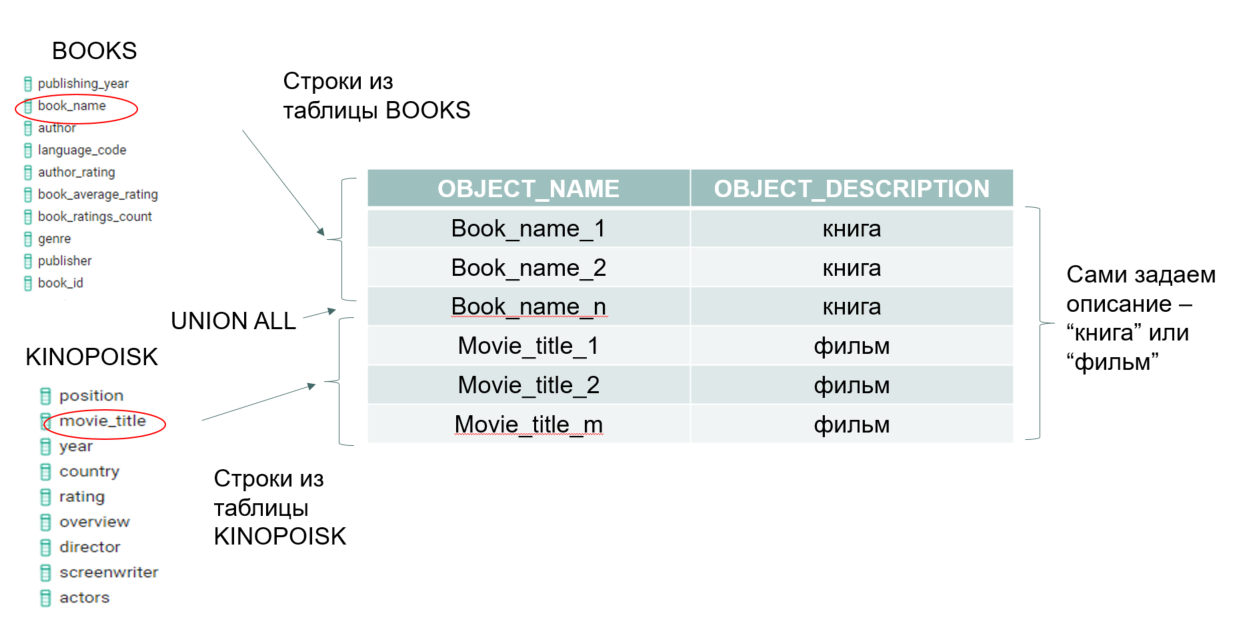

Общий принцип мы поняли, разберёмся в деталях:

В запросе мы использовали оператор UNION ALL — он присоединяет любой результат запроса к другому «снизу» при условии, что у них **одинаковая структура**, а именно:

* одинаковый тип данных;
    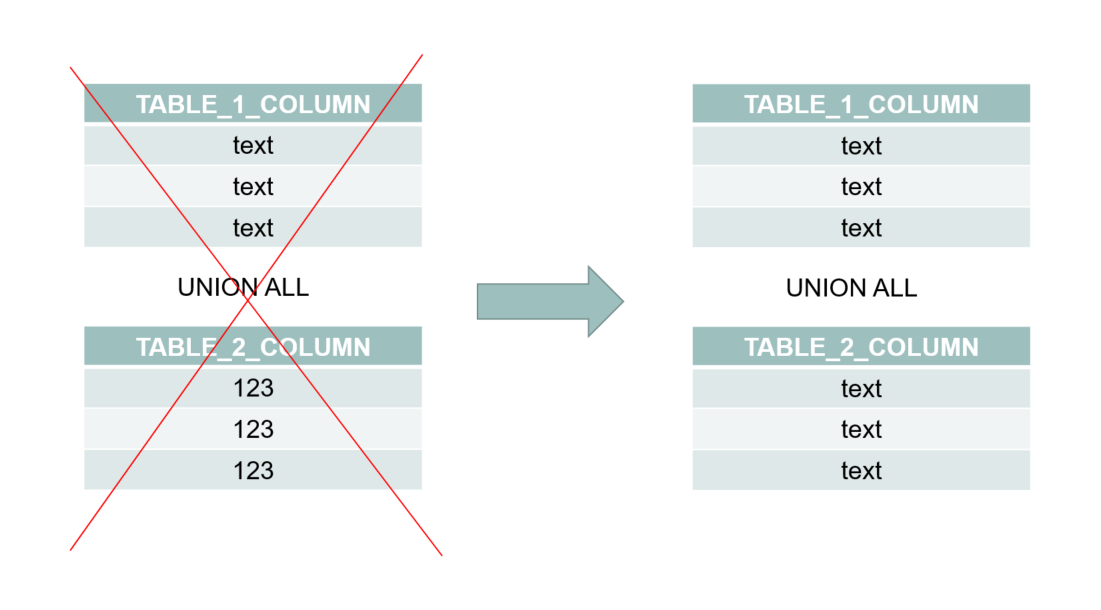
* одинаковое количество столбцов;
    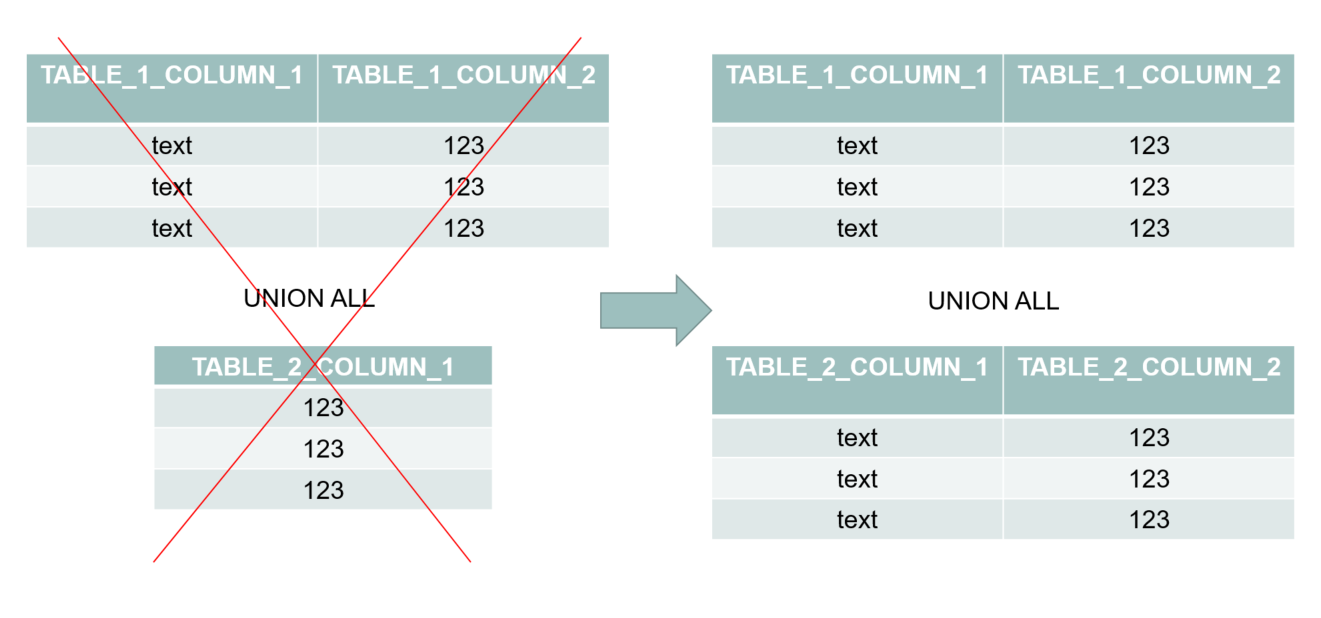
* одинаковый порядок столбцов согласно типу данных.
    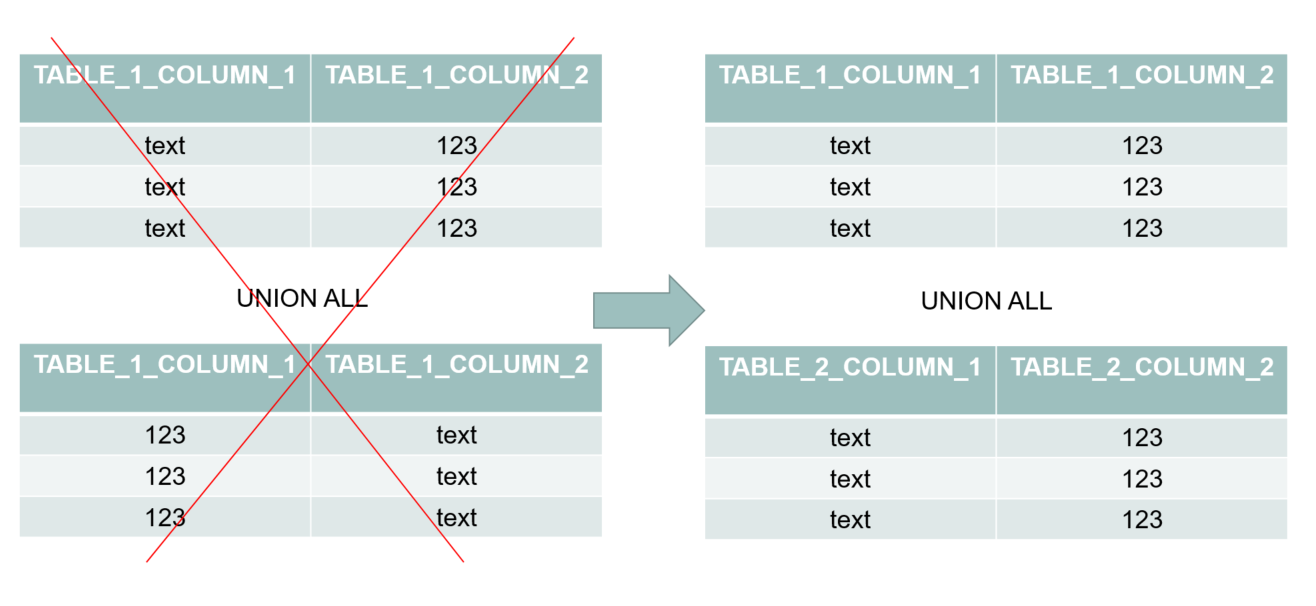

## ВИДЫ UNION

Оператор присоединения существует в двух вариантах:

* UNION выводит только **уникальные** записи;
* UNION ALL присоединяет **все строки** последующих таблиц к предыдущим, без ограничений по уникальности.

**Важно!** UNION оставляет только уникальные значения, а потому требует дополнительных вычислительных мощностей и памяти (в данном случае можно провести аналогию с DISTINCT). Поэтому если вы уверены в отсутствии дубликатов в данных или они вам не важны, предпочтительнее использовать UNION ALL.

Проверить, как различаются операторы, вы сможете при выполнении заданий 2.1 и 3.1.

## СИНТАКСИС

Запрос строится таким образом:

<code>

SELECT

         n columns

FROM 

         table_1


UNION ALL


SELECT 

         n columns

FROM 

         table_2

...

UNION ALL

SELECT 

         n columns

FROM 

         table_n
</code>

Результатом выполнения такого запроса будут строки table_1, table_2, ..., table_n, соединённые одни под другими и выведенные в единой выдаче.

**Важно!** Названия итоговых колонок в выводе будут такие же, как в первом блоке SELECT, даже если они отличаются в других блоках подзапросов.
Пришла пора испытать функцию UNION(ALL) на практике.

Обратимся к нашему датасету о транспортной компании и посмотрим, как сформировать справочник с ID всех таблиц и указанием объекта, к которому он относится.

<code>

SELECT

         c.city_id object_name, 'id города' object_type

FROM 

         sql.city c


UNION ALL

SELECT

         d.driver_id other_name, 'id водителя' other_type
         
FROM 

         sql.driver d


UNION ALL

SELECT

         s.ship_id, 'id доставки'

FROM 

         sql.shipment s


UNION ALL

SELECT

         c.cust_id, 'id клиента'

FROM 

         sql.customer c


UNION ALL

SELECT

         t.truck_id, 'id грузовика'

FROM 

         sql.truck t

ORDER BY 1
</code>

**Обратите внимание!** Несмотря на исходные названия колонок other_name и other_type во втором подзапросе, в выводе мы получим названия, которые дали в первом блоке: object_name и object_type.

Другая особенность — в применении сортировки ORDER BY: она всегда будет относиться к итоговому результату всего запроса с UNION ALL.

В случаях, когда необходимо применить команду ORDER BY или LIMIT не к итоговому результату, а к каждой части запроса, можно обернуть подзапросы в скобки.

Чтобы посмотреть, как это работает, вернёмся к нашему примеру с общим справочником по фильмам и книгам.

Мы уже знаем, что можно легко и непринуждённо применить операторы ORDER BY и LIMIT ко всему результату запроса.

<code>

SELECT book_name object_name, 'книга' object_descritption 

FROM public.books

UNION ALL

SELECT movie_title, 'фильм' 

FROM sql.kinopoisk

ORDER BY 1

LIMIT 1
</code>

Всё бы хорошо, только в таком случае отсортирован будет весь общий справочник, а в выводе останется одна строка с названием объекта, идущим первым по алфавиту.

А если мы не хотим общую сортировку? Может, нам нужны строки с названием как фильма, так и книги, идущих первыми по алфавиту.

Нет ничего проще — отсортируем каждую часть запроса по отдельности и объединим результаты!


Просто добавим ORDER BY и LIMIT ещё и в первую часть запроса:

<code>

SELECT book_name object_name, 'книга' object_descritption 

FROM public.books

ORDER BY 1

LIMIT 1

UNION ALL

SELECT movie_title, 'фильм' 

FROM sql.kinopoisk

ORDER BY 1

LIMIT 1
</code>

Вместо результата получим сообщение о синтаксической ошибке: "...syntax error at or near "UNION"..." Очевидно, этот фокус не удался.

Не стоит огорчаться, ведь проблему можно решить одним (ну, почти) движением руки — просто добавив скобки вокруг каждой из частей запроса.

<code>

(SELECT book_name object_name, 'книга' object_descritption 

FROM public.books

ORDER BY 
1
LIMIT 1)

UNION ALL

(SELECT movie_title, 'фильм' 

FROM sql.kinopoisk

ORDER BY 1

LIMIT 1)
</code>

Отлично! Мы получили именно то, что хотели.

⚡ **Важно!** Если платформа не принимает ваш вариант кода, обращайте внимание на выпадающий пункт меню **See full output**: там иногда могут быть подсказки о причине ошибки.

# 3. UNION и ограничение типов данных

## ПОЧЕМУ ТАК ВАЖЕН ТИП ДАННЫХ?

Как мы уже знаем, UNION может быть использован только в случае полного соответствия столбцов и их типов в объединяемых запросах.

Допустим, мы хотим вывести список всех id городов и их названий в одном столбце.


Давайте напишем запрос, который позволит получить нужный нам результат.

<code>

SELECT 

         c.city_id

FROM

         sql.city c


UNION ALL

SELECT 

         cc.city_name

FROM

         sql.city cc
</code>

Вместо результата вы получите сообщение об ошибке: "ERROR: UNION types integer and text cannot be matched". Дело в том, что мы попытались объединить числовой и строковый типы в одной колонке, а это невозможно.

Если мы всё же хотим выполнить поставленную задачу, придётся привести оба столбца к одному типу данных. Не каждый текст может быть приведён к числу, зато каждое число может быть представлено в текстовом формате.

Забегая вперёд, скажем пару слов о типизации столбцов. Для типизации в Postgres составляется запрос по модели column_name::column_type.

Таким образом, чтобы перевести city_id в текст, нам потребуется написать city_id::text.

**Важно!** Любой тип данных может быть приведён к текстовому формату — эту возможность целесообразно использовать для соединения разнородных сущностей. Главное — помнить, что сортировка текста **отличается** от сортировки чисел и дат.

Немного подправим запрос, чтобы получить желаемый результат.

<code>

SELECT 

         c.city_id::text

FROM

         sql.city c


UNION ALL

SELECT 

         cc.city_name

FROM

         sql.city cc
</code>

# 4. UNION ALL и промежуточные итоги

## ВОЗМОЖНОСТИ UNION

✍ Помимо соединения разнородных сущностей в единый справочник, UNION ALL часто используется для **подведения промежуточных итогов** и **выведения результатов агрегатных функций**.

Кроме агрегатных функций, в запросах с UNION могут использоваться функции группировки и выборки.

Попробуем вывести обобщённые данные о населении по всем городам, с детализацией до конкретного города.

<code>

SELECT

         c.city_name,

         c.population

FROM

         sql.city c
         
UNION ALL

SELECT

         'total',

         SUM(c.population)

FROM

         sql.city c

ORDER BY 2 DESC
</code>

Визуально это действие можно представить так:

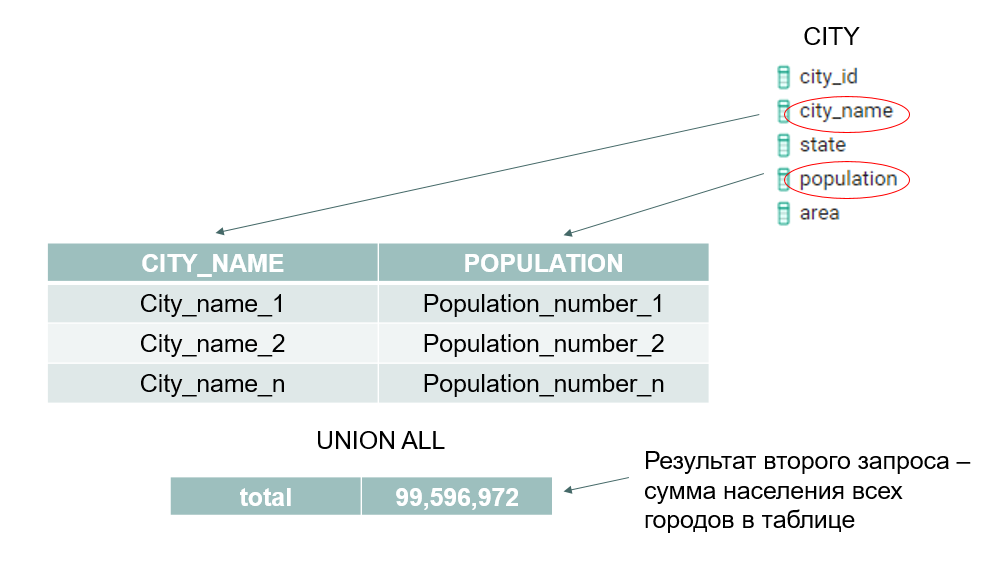

Выполнив запрос в Metabase, вы заметите, что сначала выведен итоговый результат с суммой населения всех городов в таблице, а затем по каждому городу в отдельности.

# 5. UNION и дополнительные условия

✍ UNION также может быть использован для разделения существующей выборки по критерию «выполнение определённого условия».

Например, с помощью UNION можно отобразить, у кого из водителей заполнен столбец с номером телефона.

<code>

SELECT

         d.first_name,

         d.last_name,

         'телефон заполнен' phone_info

FROM

         sql.driver d

WHERE d.phone IS NOT NULL

UNION

SELECT

         d.first_name,

         d.last_name,

         'телефон не заполнен' phone_info

FROM

         sql.driver d

WHERE d.phone IS NULL
</code>

# 6. UNION и ручная генерация

✍ UNION можно использовать для создания справочников прямо в коде запроса. К примеру, если мы хотим вручную ввести какие-то значения и произвести с ними некоторые манипуляции или дополнить существующую выдачу своими значениями.

Составим запрос, который позволит вывести первые три буквы алфавита и их порядковые номера.

<code>

SELECT 

         'a' letter,'1' ordinal_position

UNION 

SELECT 

         'b','2'

UNION 

SELECT

         'c','3'
</code>

Существуют сложные алгоритмы сравнения текстовых значений, но главный смысл сводится к одному: сравнение производится на основе таблицы unicode и позиции элемента в ней с учётом определённых условий.

# 7. EXCEPT

## ИСКЛЮЧАЕМ ПОВТОРЯЮЩИЕСЯ ДАННЫЕ

Предположим, нам нужно узнать, в какие города осуществлялась доставка, **за исключением** тех, в которых проживают водители.

<code>

SELECT

         c.city_name

FROM

         sql.shipment s

JOIN sql.city c ON s.city_id = c.city_id

EXCEPT

SELECT

         cc.city_name

FROM

         sql.driver d 

JOIN sql.city cc ON d.city_id=cc.city_id

ORDER BY 1
</code>

Все водители проживают в городе Memphis, и мы видим, что он не выводится в результате запроса.

Как вы, должно быть, заметили, для решения этой задачи мы использовали оператор EXCEPT. Принципы его работы мы сейчас разберём ↓

Чтобы лучше понять данный тип присоединения, предлагаем ознакомиться с **диаграммой Венна** — математическим инструментом, представляющим возможные логические связи между соединёнными наборами данных.

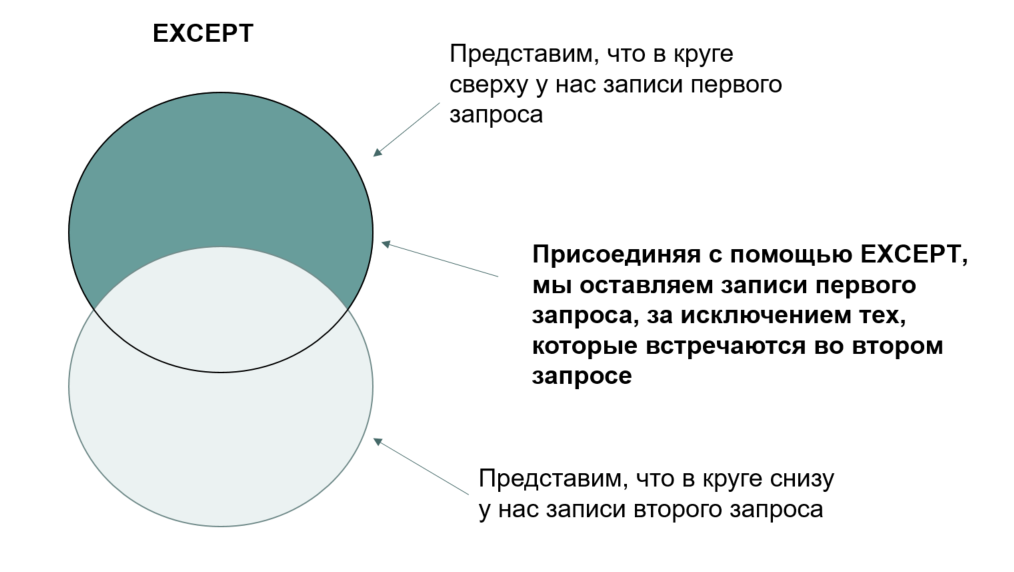

Синтаксические правила для оператора EXCEPT такие же, как и для UNION:

* одинаковый тип данных;
* одинаковое количество столбцов;
* одинаковый порядок столбцов согласно типу данных.

Синтаксис выглядит следующим образом:

<code>
SELECT 

         n columns

FROM 

         table_1

EXCEPT

SELECT 

         n columns

FROM 

         table_2
</code>

Мы уже знаем, как решить такую задачу с использованием LEFT JOIN. Вариант с EXCEPT будет полезен в тех случаях, когда у вас много столбцов и вам не хочется прописывать их равенство в условии для JOIN.

Предположим, у нас есть информация о продажах канцелярского магазина за май и июнь.

Какие-то позиции продавались и в том, и в другом месяце, а какие-то — только в одном. Использовав EXCEPT, мы можем оставить только те товары, которые есть в первом запросе (например, за май), но отсутствуют во втором запросе (например, за июнь).

Графически действие оператора можно представить следующим образом:

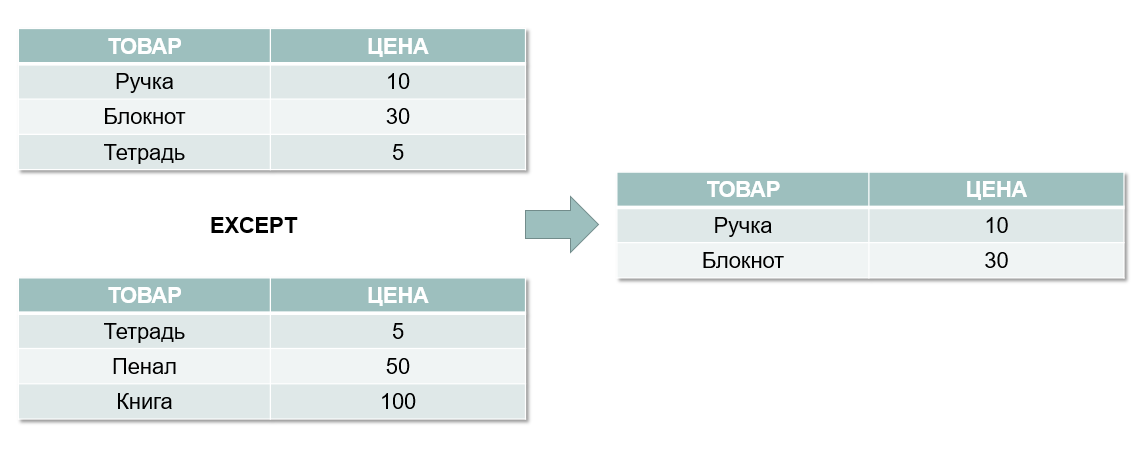

Таким образом, при присоединении с помощью EXCEPT мы вывели только те товары, которые были проданы в мае, но не в июне. Чтобы найти продажи по тем позициям, что были реализованы в июне, а в мае — нет, необходимо поменять запросы местами.

# 8. INTERSECT

## ВЫБИРАЕМ ОБЩИЕ ДАННЫЕ

А что если нам надо вывести общие записи — те, что существуют в нескольких таблицах?

Предположим, нам надо вывести совпадающие по названию города и штаты.

<code>

SELECT 

         c.city_name object_name

FROM 

         sql.city c

INTERSECT

SELECT 

         cc.state

FROM 

         sql.city cc

ORDER BY 1
</code>

Как видим, с помощью оператора INTERSECT мы вывели названия городов и штатов, которые совпадают: New York, Washington и Wyoming. Присмотримся к нему внимательнее.

Чтобы лучше понять, как работает этот оператор, вновь обратимся к диаграмме Венна: INTERSECT оставляет из результатов первого запроса все строки, которые совпали с результатом выполнения второго запроса.

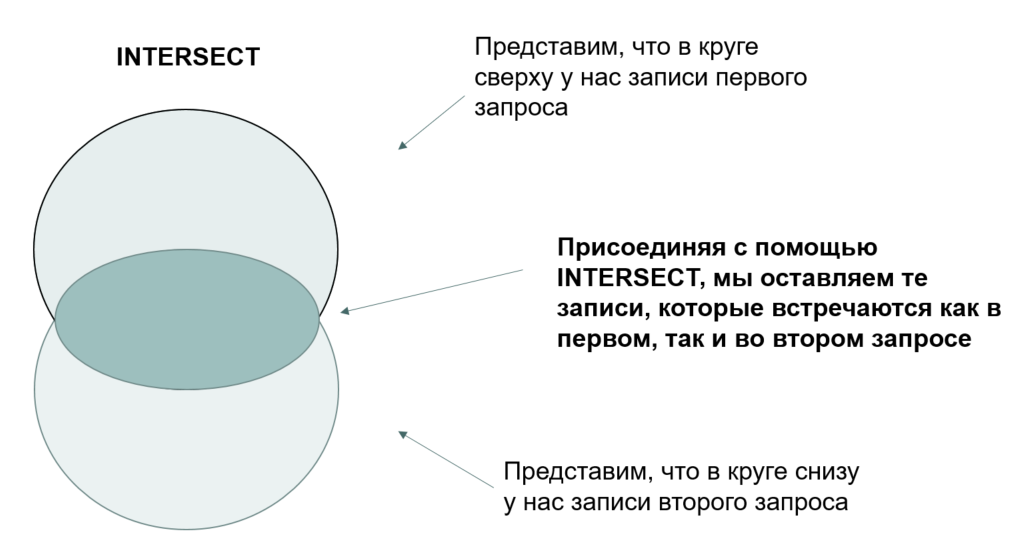

Синтаксис запроса с оператором INTERSECT выглядит следующим образом:

<code>

SELECT 

         n columns

FROM 

         table_1

INTERSECT

SELECT 

         n columns

FROM 

         table_2
</code>

Вернёмся к нашему примеру с продажами канцтоваров.

С помощью оператора INTERSECT мы можем вывести те позиции, которые продавались и в мае, и в июне. Визуализировать это действие можно примерно так:

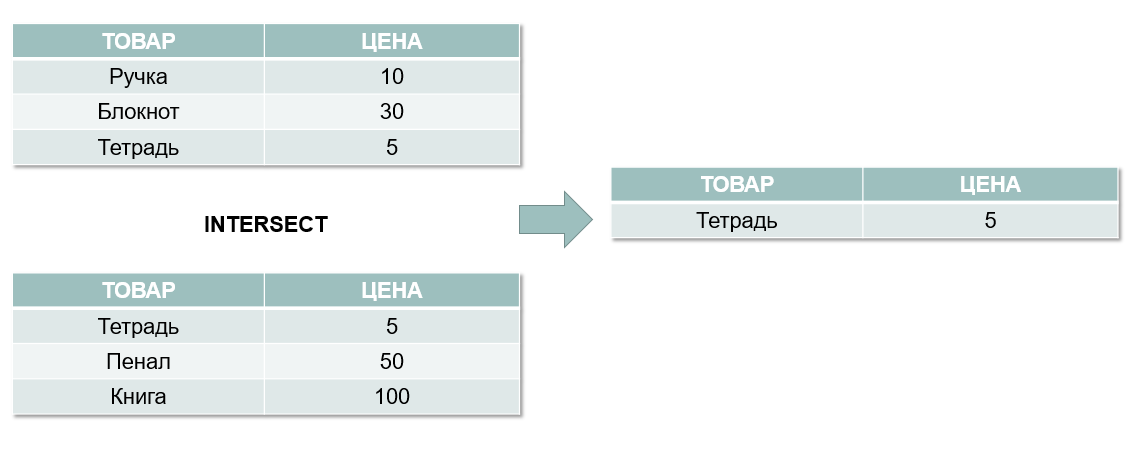

Оператор INTERSECT оставляет только те строки, которые являются общими для двух запросов (в нашем примере это Тетрадь).

Как EXCEPT, так и INTERSECT убирают дубликаты, если они имеются.

# 9. Итоги. Закрепление знаний

✍ В этом модуле вы освоили ещё несколько возможностей из функционала SQL.

Теперь вы умеете:

* присоединять таблицы «снизу», одну под другой;
* исключать или, наоборот, выбирать повторяющиеся записи из двух таблиц;
* вручную добавлять записи в таблицу.

Запишем структуру запроса с учётом полученных знаний.

<code>

SELECT 

         N columns

FROM 

         table_1

UNION / UNION ALL / EXCEPT / INTERSECT 

SELECT 

         N columns

FROM 

         table_2
</code>

### ДОПОЛНИТЕЛЬНЫЕ СВЕДЕНИЯ

Напоследок разберём несколько вопросов, которые часто задают на собеседованиях ↓

### И ЭТО ЕЩЁ НЕ ВСЁ!

Знания по темам этого модуля зачастую проверяют работодатели на собеседованиях. Предлагаем вам ознакомиться с вопросами, с которыми вы можете столкнуться при поиске работы. 

**Важно!** Это задания на самопроверку, они необязательные и мы не будем оценивать качество их решения. На некоторые вопросы будет предоставляться ответ, а на некоторые — нет. Настоятельно рекомендуем вам попробовать найти ответ самостоятельно, прежде чем открывать его.

⚡ Мы не добавляем скрипты для таблиц, которые нужны для заданий, так как именно в таком виде их получают кандидаты на собеседованиях.



### Вопрос 2

Дан источник данных — таблица TEST_SQL.

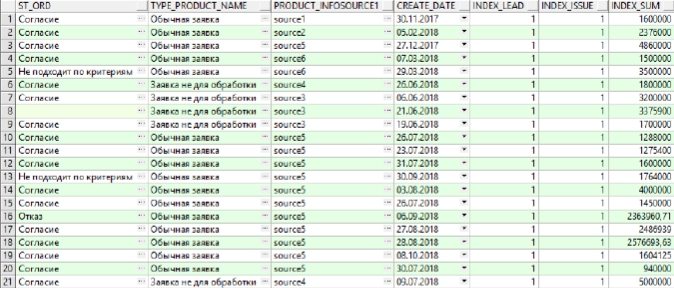

**Поля таблицы:**

* ST_ORD (Varchar) — статус заявки;
* TYPE_PRODUCT_NAME (Varchar) — тип заявки;
* PRODUCT_INFOSOURCE1 (Varchar) — источник;
* CREATE_DATE (Date) — дата создания заявки;
* INDEX_LEAD (Number) — индикатор заявки (флаг 0/1 определяет регистрацию лида в системе);
* INDEX_ISSUE (Number) — индикатор выдачи (флаг 0/1 определяет наличие выдачи по заявке);
* INDEX_SUM (Number) — сумма по продукту.

**Задание 1**. Сгруппируйте по месяцам количество заявок и сумму выдач, вычислите долю выдач.

**Задание 2**. Определите источник, через который пришло больше всего заявок.

**Задание 3**. Выделите количество заявок, которые являются ошибочными.

*Критерии ошибки:*

* Статус заявки не проставляется или имеет значение «тестовая заявка».
* Заявка была создана в августе 2018 года.
* Присутствует индикатор выдачи, но при этом лид не был зарегистрирован в системе.

**Задание 4**. Каким будет результат выполнения запросов ниже, если в поле CREATE_DATE будет содержаться значение 30.11.2017?

<code>

select trunc(create_date, 'dd') , create_date from test_sql


select trunc(create_date, 'mm') , create_date from test_sql


select trunc(create_date, 'mm')+1, create_date from test_sql
</code>
